In [29]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [30]:
import sys
def custom_excepthook(type, value, traceback):
    pass
sys.excepthook = custom_excepthook

In [31]:
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dxdt = [a*x1 - R*x1*x2 - a*x1*x4, R*x1*x2 - a*x2*x4 - x2, b*x3 - a*c*x3*x4, d*(x1 + x2 + x3)*x4 - d*x4]
    return dxdt


In [32]:
def euler_method(f, x0, t, args):
    dt = t[1] - t[0]
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        x[i] = x[i-1] + dt * np.array(f(x[i-1], t[i-1], *args))
    return x


In [33]:
def rk4_method(f, x0, t, args):
    dt = t[1] - t[0]
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        k1 = dt * np.array(f(x[i-1], t[i-1], *args))
        k2 = dt * np.array(f(x[i-1] + k1/2, t[i-1] + dt/2, *args))
        k3 = dt * np.array(f(x[i-1] + k2/2, t[i-1] + dt/2, *args))
        k4 = dt * np.array(f(x[i-1] + k3, t[i-1] + dt, *args))
        x[i] = x[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return x


In [34]:
def lyapunov_exponent(x0, t, a, b, c, d, R, dt):
    n = len(x0)
    w = np.eye(n)  
    x = x0.copy()
    lambdas = np.zeros(n)

    for i in range(len(t)):
        # Ortofonalizacion usando Gram-Schmidt
        for j in range(n):
            for k in range(j):
                w[:,j] -= np.dot(w[:,j], w[:,k]) * w[:,k]
            w[:,j] /= np.linalg.norm(w[:,j])

        x += sistema(x, t[i], a, b, c, d, R) * dt
        for j in range(n):
            w[:,j] += np.dot(sistema(x + dt*w[:,j], t[i], a, b, c, d, R) - sistema(x, t[i], a, b, c, d, R), w[:,j]) / dt

        lambdas += np.log(np.linalg.norm(w, axis=0)) / dt

    return lambdas / len(t) 


## Probando diferencias entre el metodo Runge-Kutta 4, Euler y el odeint de scipy
> Notese que la  grafica del Runge-Kutta se superpone a la de odeint

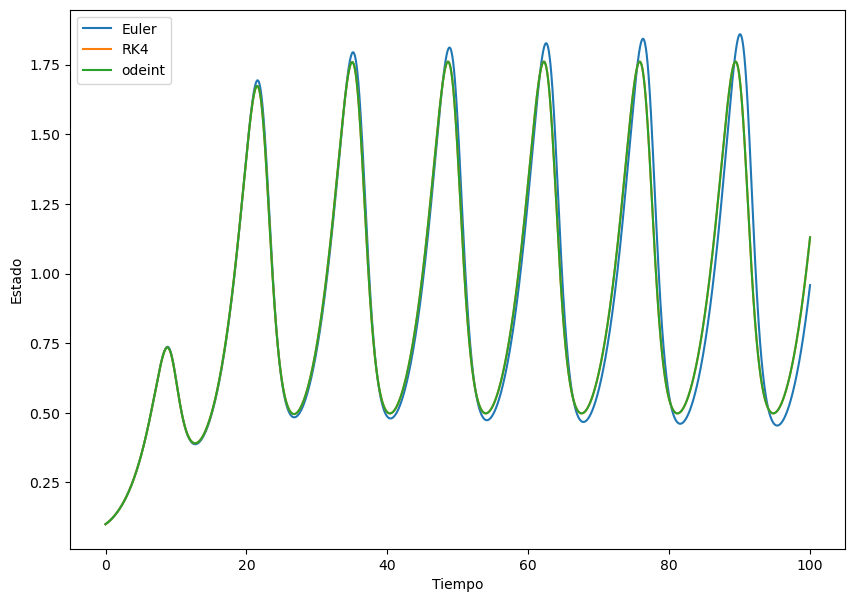

In [35]:
from scipy.integrate import odeint

# Parámetros y condiciones iniciales
a, b, c, d, R = 0.3, 0.3, 2, 0.8, 0.1
x0 = [0.1, 0.3, 0.3, 0.3]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

# Resuelve el sistema con los tres métodos
x_euler = euler_method(sistema, x0, t, (a, b, c, d, R))
x_rk4 = rk4_method(sistema, x0, t, (a, b, c, d, R))
x_odeint = odeint(sistema, x0, t, args=(a, b, c, d, R))

# Compara los resultados
plt.figure(figsize=(10, 7))
plt.plot(t, x_euler[:, 0], label='Euler')
plt.plot(t, x_rk4[:, 0], label='RK4')
plt.plot(t, x_odeint[:, 0], label='odeint')
plt.xlabel('Tiempo')
plt.ylabel('Estado')
plt.legend()
plt.show()


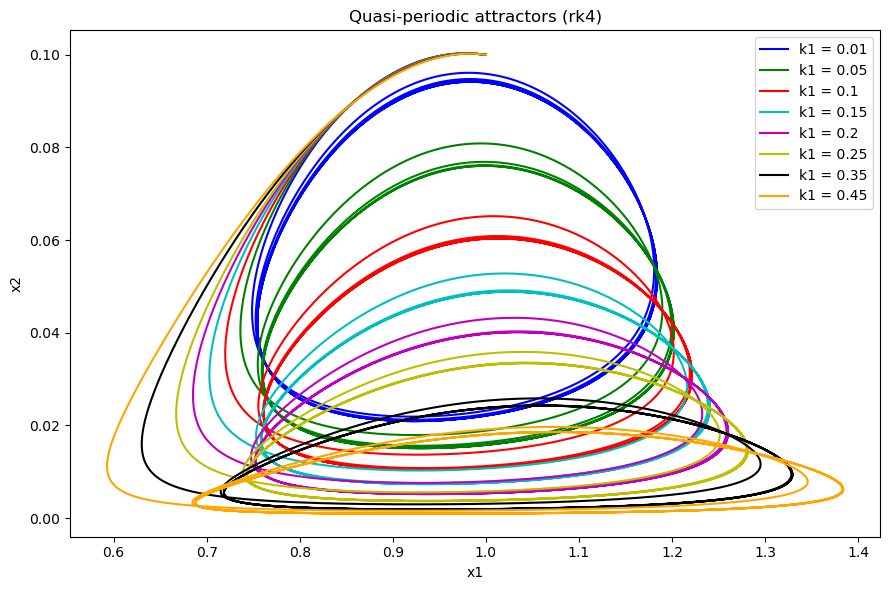

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición del sistema de ecuaciones
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

# Parámetros
a = 0.3
b = 0.4
c = 2
d = 0.3
R = 1.3

# Condiciones iniciales
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
initial_conditions = [[1, 0.1, k1, 0.9] for k1 in k1_values]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i, x0 in enumerate(initial_conditions):
    # Resolvemos el sistema de ecuaciones
    x = rk4_method(sistema, x0, t, args=(a, b, c, d, R))
    
    # Gráfica de fase
    ax.plot(x[:, 0], x[:, 1], color=colors[i], label=f'k1 = {k1_values[i]}')

# Label the axes and create a legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.set_title('Quasi-periodic attractors (rk4)')

plt.tight_layout()
plt.show()



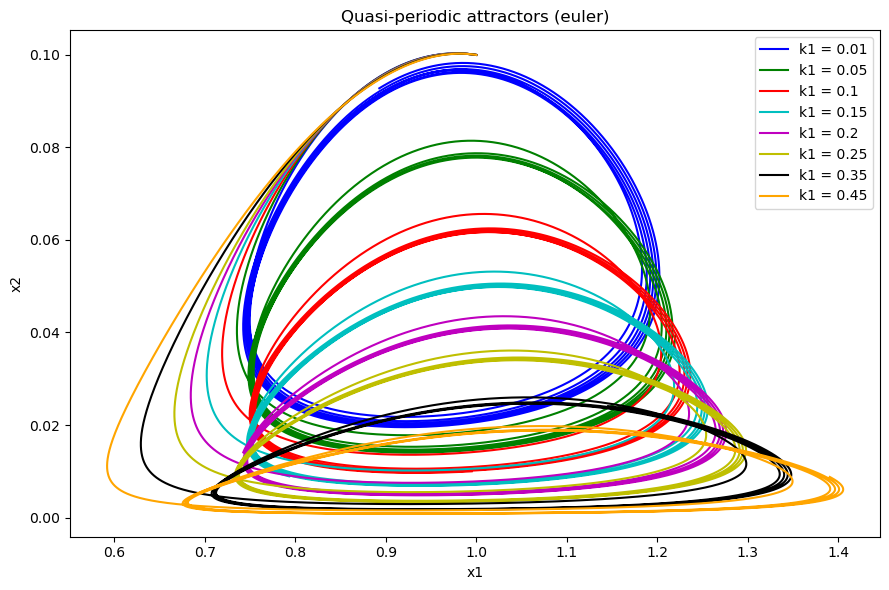

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición del sistema de ecuaciones
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

# Parámetros
a = 0.3
b = 0.4
c = 2
d = 0.3
R = 1.3

# Condiciones iniciales
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
initial_conditions = [[1, 0.1, k1, 0.9] for k1 in k1_values]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i, x0 in enumerate(initial_conditions):
    # Resolvemos el sistema de ecuaciones
    x = euler_method(sistema, x0, t, args=(a, b, c, d, R))
    
    # Gráfica de fase
    ax.plot(x[:, 0], x[:, 1], color=colors[i], label=f'k1 = {k1_values[i]}')

# Label the axes and create a legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.set_title('Quasi-periodic attractors (euler)')

plt.tight_layout()
plt.show()



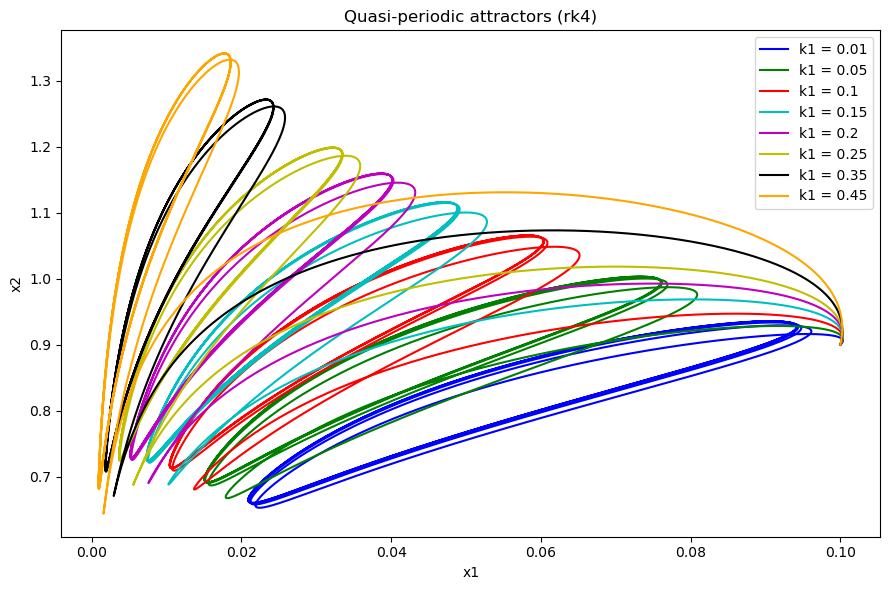

In [38]:
# Definición del sistema de ecuaciones
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

# Parámetros
a = 0.3
b = 0.4
c = 2
d = 0.3
R = 1.3

# Condiciones iniciales
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
initial_conditions = [[1, 0.1, k1, 0.9] for k1 in k1_values]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i, x0 in enumerate(initial_conditions):
    # Resolvemos el sistema de ecuaciones
    x = rk4_method(sistema, x0, t, args=(a, b, c, d, R))
    
    # Gráfica de fase
    ax.plot(x[:, 1], x[:, 3], color=colors[i], label=f'k1 = {k1_values[i]}')

# Label the axes and create a legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.set_title('Quasi-periodic attractors (rk4)')

plt.tight_layout()
plt.show()

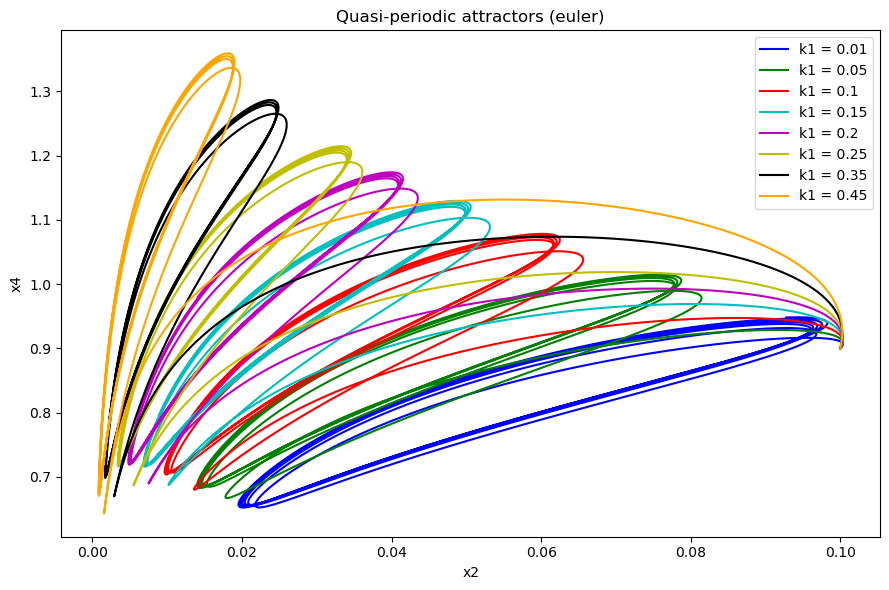

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición del sistema de ecuaciones
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

# Parámetros
a = 0.3
b = 0.4
c = 2
d = 0.3
R = 1.3

# Condiciones iniciales
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
initial_conditions = [[1, 0.1, k1, 0.9] for k1 in k1_values]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i, x0 in enumerate(initial_conditions):
    # Resolvemos el sistema de ecuaciones
    x = euler_method(sistema, x0, t, args=(a, b, c, d, R))
    
    # Gráfica de fase
    ax.plot(x[:, 1], x[:, 3], color=colors[i], label=f'k1 = {k1_values[i]}')

# Label the axes and create a legend
ax.set_xlabel('x2')
ax.set_ylabel('x4')
ax.legend()
ax.set_title('Quasi-periodic attractors (euler)')

plt.tight_layout()
plt.show()



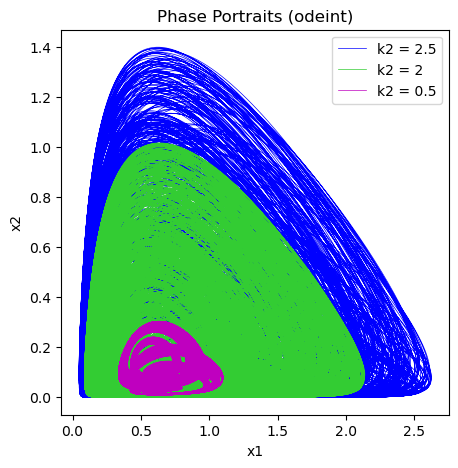

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.299, 0.3, 2, 1.05, 1.799
k2_values = [2.5,2,0.5]

# Time values
t = np.linspace(0, 15000, 1000000)

fig, ax = plt.subplots(figsize=(5, 5))

colors = ['b', (0.2, 0.8, 0.2) , 'm', 'c', 'm']

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.2, 0.2, 0.2]
    # Solve the system
    sol = odeint(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax.plot(sol[:, 0], sol[:, 1], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Phase Portraits (odeint)')
ax.legend()

plt.show()



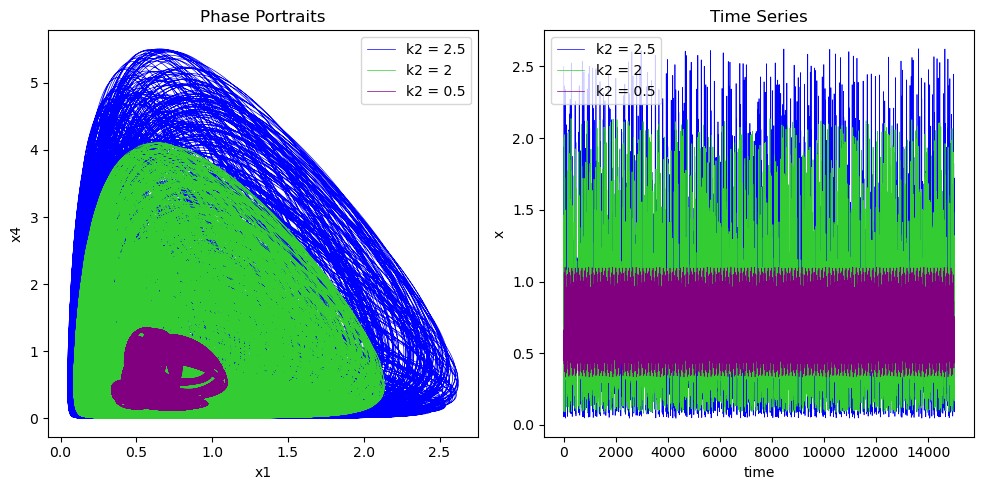

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.299, 0.3, 2, 1.05, 1.799
k2_values = [2.5,2,0.5]
colors = ['blue', (0.2, 0.8, 0.2), 'purple']

# Time values
t = np.linspace(0, 15000, 1000000)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.2, 0.2, 0.2]
    # Solve the system
    sol = odeint(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax[0].plot(sol[:, 0], sol[:, 3], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)
    # Time series
    ax[1].plot(t, sol[:, 0], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)

ax[0].set_xlabel('x1')
ax[0].set_ylabel('x4')
ax[0].set_title('Phase Portraits')
ax[0].legend()

ax[1].set_xlabel('time')
ax[1].set_ylabel('x')
ax[1].set_title('Time Series')
ax[1].legend()

plt.tight_layout()
plt.show()


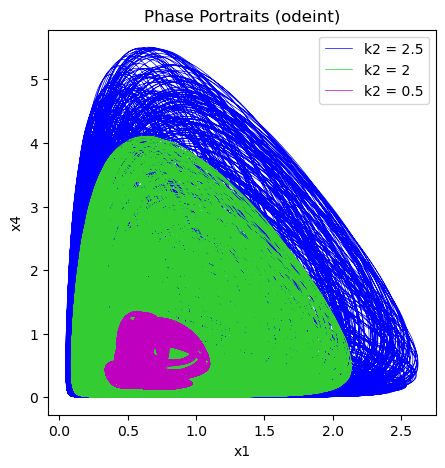

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.299, 0.3, 2, 1.05, 1.799
k2_values = [2.5,2,0.5]

# Time values
t = np.linspace(0, 15000, 1000000)

fig, ax = plt.subplots(figsize=(5, 5))

colors = ['b', (0.2, 0.8, 0.2) , 'm', 'c', 'm']

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.2, 0.2, 0.2]
    # Solve the system
    sol = odeint(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax.plot(sol[:, 0], sol[:, 3], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x4')
ax.set_title('Phase Portraits (odeint)')
ax.legend()

plt.show()



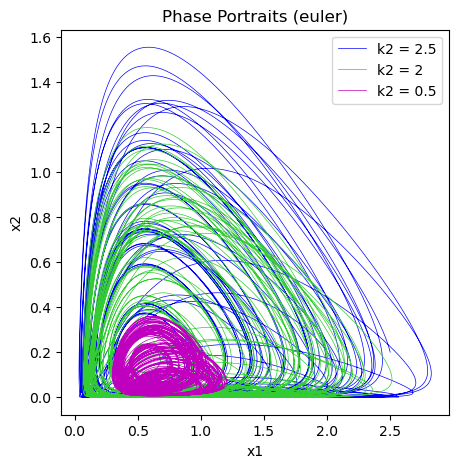

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.299, 0.3, 2, 1.05, 1.799
k2_values = [2.5,2,0.5]

# Time values
t = np.linspace(0, 1500, 1000000)

fig, ax = plt.subplots(figsize=(5, 5))

colors = ['b', (0.2, 0.8, 0.2) , 'm', 'c', 'm']

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.2, 0.2, 0.2]
    # Solve the system
    sol = euler_method(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax.plot(sol[:, 0], sol[:, 1], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Phase Portraits (euler)')
ax.legend()

plt.show()



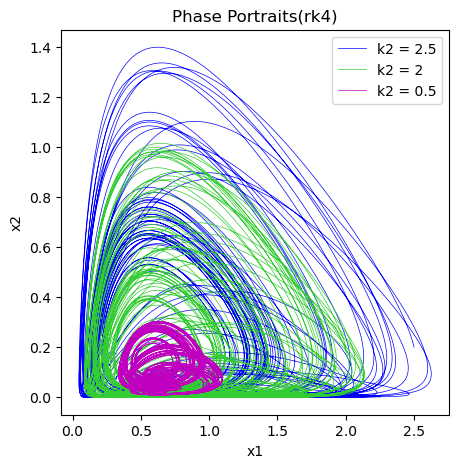

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.299, 0.3, 2, 1.05, 1.799
k2_values = [2.5,2,0.5]

# Time values
t = np.linspace(0, 1500, 1000000)

fig, ax = plt.subplots(figsize=(5, 5))

colors = ['b', (0.2, 0.8, 0.2) , 'm', 'c', 'm']

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.2, 0.2, 0.2]
    # Solve the system
    sol = rk4_method(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax.plot(sol[:, 0], sol[:, 1], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Phase Portraits(rk4)')
ax.legend()

plt.show()



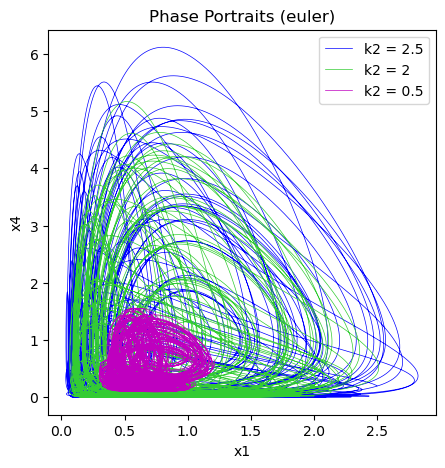

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.299, 0.3, 2, 1.05, 1.799
k2_values = [2.5,2,0.5]

# Time values
t = np.linspace(0, 1500, 1000000)

fig, ax = plt.subplots(figsize=(5, 5))

colors = ['b', (0.2, 0.8, 0.2) , 'm', 'c', 'm']

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.2, 0.2, 0.2]
    # Solve the system
    sol = euler_method(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax.plot(sol[:, 0], sol[:, 3], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x4')
ax.set_title('Phase Portraits (euler)')
ax.legend()

plt.show()



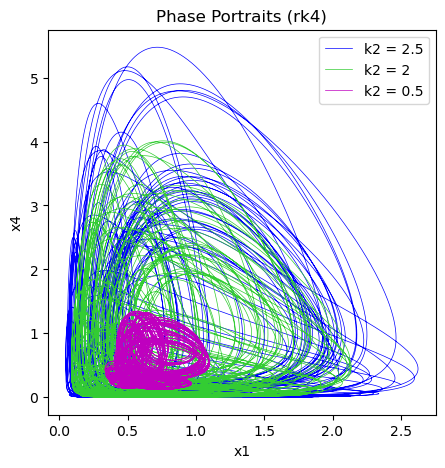

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.299, 0.3, 2, 1.05, 1.799
k2_values = [2.5,2,0.5]

# Time values
t = np.linspace(0, 1500, 1000000)

fig, ax = plt.subplots(figsize=(5, 5))

colors = ['b', (0.2, 0.8, 0.2) , 'm', 'c', 'm']

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.2, 0.2, 0.2]
    # Solve the system
    sol = rk4_method(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax.plot(sol[:, 0], sol[:, 3], color=colors[i], label=f'k2 = {k2}',linewidth=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x4')
ax.set_title('Phase Portraits (rk4)')
ax.legend()

plt.show()



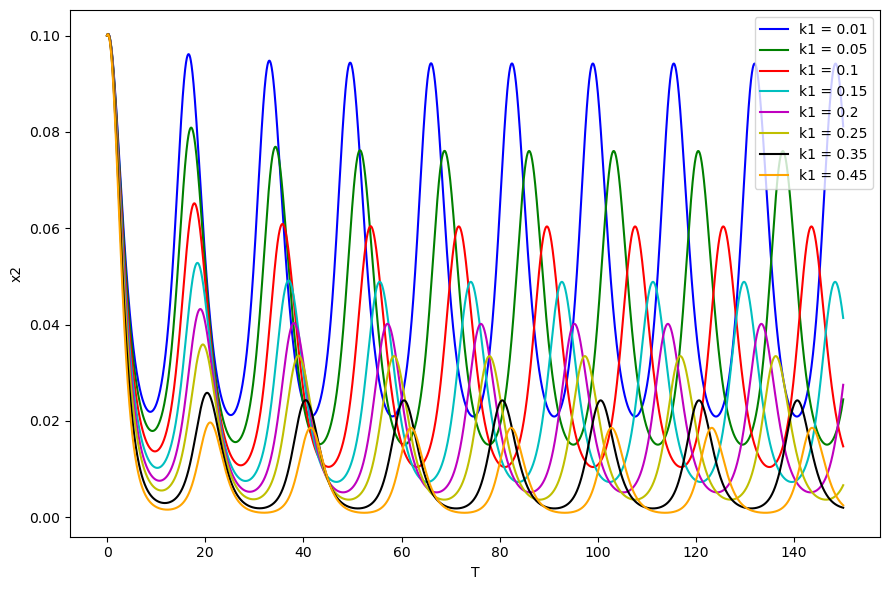

In [47]:
# Definición del sistema de ecuaciones
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

# Parámetros
a = 0.3
b = 0.4
c = 2
d = 0.3
R = 1.3

# Condiciones iniciales
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
initial_conditions = [[1, 0.1, k1, 0.9] for k1 in k1_values]

# Tiempo de integración
T = 150
dt = 0.01
t = np.arange(0, T, dt)

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i, x0 in enumerate(initial_conditions):
    # Resolvemos el sistema de ecuaciones
    x = odeint(sistema, x0, t, args=(a, b, c, d, R))
    
    # Gráfica de fase
    ax.plot(t,x[:, 1], color=colors[i], label=f'k1 = {k1_values[i]}')

# Label the axes and create a legend
ax.set_xlabel('T')
ax.set_ylabel('x2')
ax.legend()

plt.tight_layout()
plt.show()

In [49]:

def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

R_values = np.linspace(1.26, 1.32, num=100)  

initial_conditions = [
    (0.1, 0.3, 0.3, 0.3),
    (0.2, 0.3, 0.3, 0.3),
    (0.3, 0.3, 0.3, 0.3),
    (0.4, 0.3, 0.3, 0.3),
    (0.5, 0.3, 0.3, 0.3)
]

a = 0.3
b = 0.3
c = 2
d = 0.8

T = 100
dt = 0.01
t = np.arange(0, T+dt, dt)

lambdas = np.zeros((len(initial_conditions), len(R_values)))

for i, x0 in enumerate(initial_conditions):
    for j, R in enumerate(R_values):
        x = odeint(sistema, x0, t, args=(a, b, c, d, R))
        # Calcula los exponentes de Lyapunov
        
        print(x.shape)
        lambdas[i, j] = lyapunov_exponent(t, x, a, b, c, d, R,dt)

for i, x0 in enumerate(initial_conditions):
    plt.plot(R_values, lambdas[i, :], label=f'x0={x0}')

plt.xlabel('R')
plt.ylabel('Exponente de Lyapunov máximo')
plt.legend()
plt.show()

(10001, 4)


c:\Users\leona\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


IndexError: index 10001 is out of bounds for axis 0 with size 10001

8
100


c:\Users\leona\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\Users\leona\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\Users\leona\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\Users\leona\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\Users\leona\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
c:\Users\leona\anaco

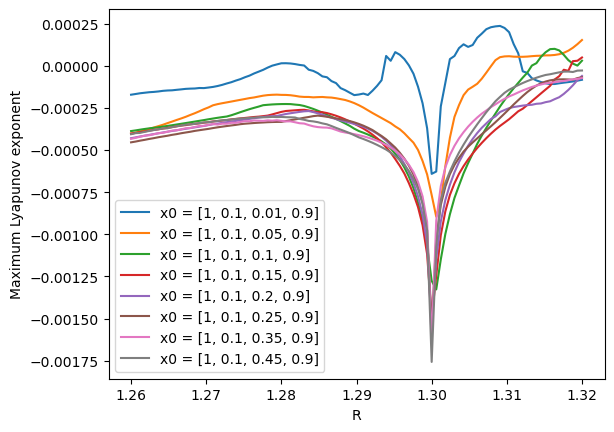

In [ ]:
import numpy as np
from scipy.integrate import odeint
import nolds
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(x, t, a, R, b, c, d):
    return [
        a*x[0] - R*x[0]*x[1] - a*x[0]*x[3],
        R*x[0]*x[1] - a*x[1]*x[3] - x[1],
        b*x[2] - a*c*x[2]*x[3],
        d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    ]

# Set the initial conditions
initial_conditions = [
    [1, 0.1, 0.01, 0.9],
    [1, 0.1, 0.05, 0.9],
    [1, 0.1, 0.10, 0.9],
    [1, 0.1, 0.15, 0.9],
    [1, 0.1, 0.20, 0.9],
    [1, 0.1, 0.25, 0.9],
    [1, 0.1, 0.35, 0.9],
    [1, 0.1, 0.45, 0.9],
]

# Set the parameters
a = 0.3
R_values = np.linspace(1.26, 1.32, 100)
b = 0.4
c = 2
d = 0.3

# Set the integration time
t = np.linspace(0, 100, 10000)

# Preallocate the array for Lyapunov exponents
lyap_exp = np.empty((len(initial_conditions), len(R_values)))

# Calculate the Lyapunov exponents for each value of R
print(len(initial_conditions))
print(len(R_values))
    
for i, x0 in enumerate(initial_conditions):
    for j, R in enumerate(R_values):
        # Solve the system
        sol = odeint(system, x0, t, args=(a, R, b, c, d))
        # Take one of the variables (for example, x[1]) and calculate the maximum Lyapunov exponent
        lyap_exp[i, j] = nolds.lyap_r(sol[:, 1])

# Now lyap_exp contains the estimated maximum Lyapunov exponent for each initial condition and each value of R

# Plot the results
for i, x0 in enumerate(initial_conditions):
    plt.plot(R_values, lyap_exp[i], label=f'x0 = {x0}')

plt.xlabel('R')
plt.ylabel('Maximum Lyapunov exponent')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import nolds

# Define el sistema de ecuaciones
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]
# Time values
t = np.linspace(0, 100, 1000)

# Valores iniciales
k2_values = np.linspace(0.1, 0.5, 50)
k3_values = np.linspace(0.5, 2.5, 50)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import nolds

# Define el sistema de ecuaciones
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]
# Time values
t = np.linspace(0, 100, 1000)

# Valores iniciales
# Grid of initial conditions
k2_values = np.linspace(0.1, 0.5, 50)
k3_values = np.linspace(0.5, 2.5, 50)

# Initialize 2D array for entropy values
entropy_values = np.zeros((len(k2_values), len(k3_values)))

# Compute sample entropy for each pair of initial conditions
for i, k2 in enumerate(k2_values):
    for j, k3 in enumerate(k3_values):
        x0 = [k2, 0.3, k3, 0.3]
        sol = odeint(system, x0, t, args=(0.3, 0.3, 2, 0.8, 1.5))
        entropy_values[i, j] = nolds.sampen(sol[:, 0])

# Create a heatmap of sample entropy values
plt.imshow(entropy_values, cmap='hot', interpolation='nearest', extent=[k3_values[0], k3_values[-1], k2_values[0], k2_values[-1]], origin='lower')
plt.colorbar(label='Sample Entropy')
plt.xlabel('k3')
plt.ylabel('k2')
plt.title('Heatmap of Sample Entropy')
plt.show()



KeyboardInterrupt: 

C:\Users\leona\AppData\Local\Temp\ipykernel_20312\2130074303.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\leona\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


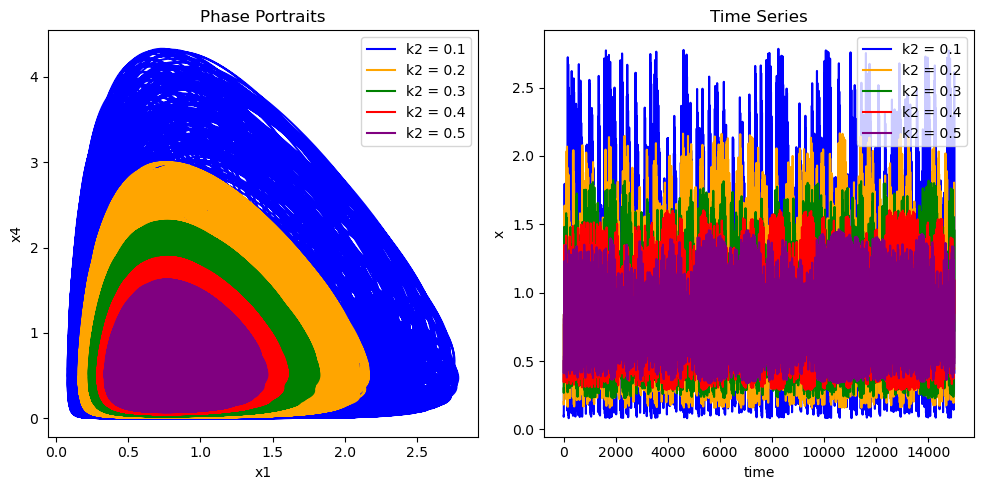

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Parameters
a, b, c, d, R = 0.3, 0.3, 2, 0.8, 1.5
k2_values = [0.1, 0.2, 0.3, 0.4, 0.5]
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Time values
t = np.linspace(0, 15000, 1000000)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, k2 in enumerate(k2_values):
    # Initial conditions
    x0 = [k2, 0.3, 0.3, 0.3]
    # Solve the system
    sol = odeint(system, x0, t, args=(a, b, c, d, R))
    # Phase portrait
    ax[0].plot(sol[:, 0], sol[:, 3], color=colors[i], label=f'k2 = {k2}')
    # Time series
    ax[1].plot(t, sol[:, 0], color=colors[i], label=f'k2 = {k2}')

ax[0].set_xlabel('x1')
ax[0].set_ylabel('x4')
ax[0].set_title('Phase Portraits')
ax[0].legend()

ax[1].set_xlabel('time')
ax[1].set_ylabel('x')
ax[1].set_title('Time Series')
ax[1].legend()

plt.tight_layout()
plt.show()


dx1/dt = a*x1 − R*x1*x2 − a*x1*x4
dx2/dt = R*x1*x2 − a*x2*x4 − x2,
dx3/dt = b*x3 − a*c*x3*x4,
dx4/dt = d *(x1 + x2 + x3) *x4 − d*x4.

In [12]:
import numpy as np
from scipy.integrate import odeint
from pyentrp import entropy as ent
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(y, t, a, b, c, d):
    x1, x2, x3, x4 = y
    dydt = [a*x1 - R*x1*x2 - a*x1*x4,
            R*x1*x2 - a*x2*x4 - x2,
            b*x3 - a*c*x3*x4,
            d*(x1 + x2 + x3)*x4 - d*x4]
    return dydt

# Set up time for integration
t = np.linspace(0, 10, 1000)

# Parameters for the system
parameters = [(0.3, 0.3, 2, 0.8), (0.299, 0.3, 2, 1.05)]
initial_conditions = [np.arange(0.1, 0.5, 0.1), np.arange(0.5, 2.5, 0.1)]

for i, param in enumerate(parameters):
    a, b, c, d = param
    entropies = np.zeros((4, len(initial_conditions[i])))  # Array to store entropies
    for j, init_cond in enumerate(initial_conditions[i]):
        y0 = [init_cond, 0.3, 0.3, 0.3]
        sol = odeint(system, y0, t, args=(a, b, c, d))
        for k in range(4):
            entropies[k,j] = ent.sample_entropy(sol[:,k], 4, 0.2*np.std(sol[:,k]))

    # Plot results
    for k in range(4):
        plt.plot(initial_conditions[i], entropies[k,:], label=f'x{k+1}')
    plt.legend()
    plt.xlabel('Initial condition')
    plt.ylabel('Sample Entropy')
    plt.title(f'Sample entropy for parameters {param}')
    plt.show()


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\leona\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\leona\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\leona\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\leona\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

NameError: name 'R' is not defined

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\leona\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\leona\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\leona\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\leona\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\leona\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\leona\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\leona\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\leona\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [1]:

import numpy as np

def RK4(f, x, t1, t2, pf, stim=None):
    """
    Fourth-order, 4-step RK routine.
    Returns the step, i.e. approximation to the integral.
    If x is defined at time t_1, then stim should be an array of
    stimulus values at times t_1, (t_1+t_2)/2, and t_2 (i.e. at t1 and t2, as
    well as at the midpoint).

    Alternatively, stim may be a function pointer.
    """
    tmid = (t1 + t2)/2.0
    dt = t2 - t1

    if stim is None:
        pf_in_1 = pf
        pf_in_mid = pf
        pf_in_2 = pf
    else:
        try:
            # test if stim is a function
            s1 = stim(t1)
            s1, smid, s2 = (stim, stim, stim)
        except TypeError:
            #  otherwise assume stim is an array
            s1, smid, s2 = (stim[0], stim[1], stim[2])
        pf_in_1 = (pf, s1)
        pf_in_mid = (pf, smid)
        pf_in_2 = (pf, s2)

    K1 = f(t1, x, pf_in_1)
    K2 = f(tmid, x + dt*K1/2.0, pf_in_mid)
    K3 = f(tmid, x + dt*K2/2.0, pf_in_mid)
    K4 = f(t2, x + dt*K3, pf_in_2)

    return dt * (K1/2.0 + K2 + K3 + K4/2.0) / 3.0

def computeLE(f, fjac, x0, t, p=(), ttrans=None):
    """
    Computes the global Lyapunov exponents for a set of ODEs.
    f - ODE function. Must take arguments like f(t, x, p) where x and t are 
        the state and time *now*, and p is a tuple of parameters. If there are 
        no model paramters, p should be set to the empty tuple.
    x0 - Initial position for calculation. Integration of transients will begin 
         from this point.
    t - Array of times over which to calculate LE.
    p - (optional) Tuple of model parameters for f.
    fjac - Jacobian of f.
    ttrans - (optional) Times over which to integrate transient behavior.
             If not specified, assumes trajectory is on the attractor.
    method - (optional) Integration method to be used by scipy.integrate.ode.
    """
    D = len(x0)
    N = len(t)
    if ttrans is not None:
        Ntrans = len(ttrans)
    dt = t[1] - t[0]

    def dPhi_dt(t, Phi, x):
        """ The variational equation """
        D = len(x)
        rPhi = np.reshape(Phi, (D, D))
        rdPhi = np.dot(fjac(t, x, p), rPhi)
        return rdPhi.flatten()

    def dSdt(t, S, p):
        """
        Differential equations for combined state/variational matrix
        propagation. This combined state is called S.
        """
        x = S[:D]
        Phi = S[D:]
        return np.append(f(t,x,p), dPhi_dt(t, Phi, x))

    # integrate transient behavior
    Phi0 = np.eye(D, dtype=np.float64).flatten()
    #S0 = np.append(x0, Phi0)

    if ttrans is not None:
        print("Integrating transient behavior...")
        #Strans = np.zeros((Ntrans, D*(D+1)), dtype=np.float64)
        #Strans[0] = S0
        xi = x0
        for i,(t1,t2) in enumerate(zip(ttrans[:-1], ttrans[1:])):
            xip1 = xi + RK4(f, xi, t1, t2, p)
            #Strans_temp = Strans[i] + RK4(dSdt, Strans[i], t1, t2, p)
            # perform QR decomposition on Phi
            #rPhi = np.reshape(Strans_temp[D:], (D, D))
            #Q,R = np.linalg.qr(rPhi)
            #Strans[i+1] = np.append(Strans_temp[:D], Q.flatten())
            xi = xip1
        x0 = xi

        #S0 = np.append(Strans[-1, :D], Phi0)
        #S0 = Strans[-1]

    # start LE calculation
    LE = np.zeros((N-1, D), dtype=np.float64)
    Ssol = np.zeros((N, D*(D+1)), dtype=np.float64)
    #Ssol[0] = S0
    Ssol[0] = np.append(x0, Phi0)

    print("Integrating system for LE calculation...")
    for i,(t1,t2) in enumerate(zip(t[:-1], t[1:])):
        Ssol_temp = Ssol[i] + RK4(dSdt, Ssol[i], t1, t2, p)
        # perform QR decomposition on Phi
        rPhi = np.reshape(Ssol_temp[D:], (D, D))
        Q,R = np.linalg.qr(rPhi)
        Ssol[i+1] = np.append(Ssol_temp[:D], Q.flatten())
        LE[i] = np.abs(np.diag(R))

    # compute LEs
    print("Computing LE spectrum...")
    LE = np.cumsum(np.log(LE),axis=0) / np.tile(t[1:],(D,1)).T
    return LE

=========>>>>>0.01
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spectrum...
Integrating system for LE calculation...
Computing LE spe

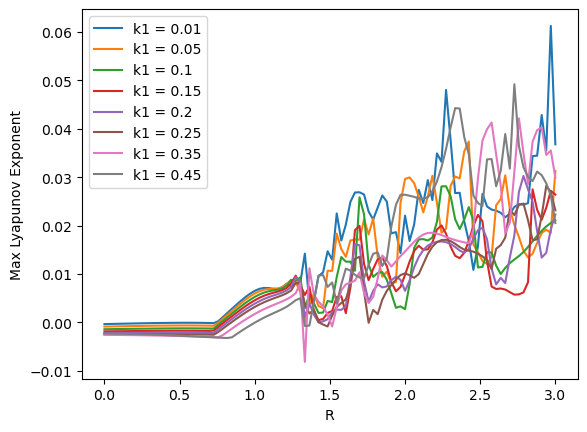

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def f(t, x, p):
    a, b, c, d, R = p
    dxdt = [a*x[0] - R*x[0]*x[1] - a*x[0]*x[3],
            R*x[0]*x[1] - a*x[1]*x[3] - x[1],
            b*x[2] - a*c*x[2]*x[3],
            d*(x[0] + x[1] + x[2])*x[3] - d*x[3]]
    return np.array(dxdt)

# Define the Jacobian of the system
def fjac(t, x, p):
    a, b, c, d, R = p
    return np.array([
        [a - R*x[1] - a*x[3], -R*x[0], 0, -a*x[0]],
        [R*x[1], R*x[0] - a*x[3] - 1, 0, -a*x[1]],
        [0, 0, b - a*c*x[3], -a*c*x[2]],
        [d*x[3], d*x[3], d*x[3], d*(x[0] + x[1] + x[2]) - d]
    ])

# Initialize parameters
a = 0.3
b = 0.4
c = 2
d = 0.3
R_values = np.linspace(0, 3, 1
                       
                       
                       00)  # Adjust as needed
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
t = np.linspace(0, 100, 10000)  # Adjust as needed

# Initialize result storage
results = []

# Calculate Lyapunov exponents for each R and each initial condition
for k1 in k1_values:
    print(f"=========>>>>>{k1}")
    x0 = [1, 0.1, k1, 0.9]
    le_values = []
    for R in R_values:
        p = (a, b, c, d, R)
        LE = computeLE(f, fjac, x0, t, p)
        max_LE = np.max(LE[-1, :])
        le_values.append(max_LE)
    results.append(le_values)

# Plot results
for i, le_values in enumerate(results):
    plt.plot(R_values, le_values, label=f"k1 = {k1_values[i]}")
plt.xlabel('R')
plt.ylabel('Max Lyapunov Exponent')
plt.legend()
plt.show()


In [8]:
import numpy as np
from scipy.integrate import odeint
from entropy import sample_entropy
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(y, t):
    a, b, c, d = 0.3, 0.3, 2, 0.8  # parameters
    k2, x, y, z = y  # variables
    dydt = [a*(y - x*x), x*(b - z) - y, x*y - c*z, d*(x - k2)]
    return dydt

def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

# Define the initial conditions and the time grid
k2_values = np.linspace(0.1, 0.5, 50)  # adjust as needed
t = np.linspace(0, 10, 1000)  # adjust as needed

# Initialize an array to store the Sample Entropy values
sam_en_values = np.empty_like(k2_values)

# Loop over the initial conditions
for i, k2 in enumerate(k2_values):
    y0 = [k2, 0.3, 0.3, 0.3]
    sol = odeint(system, y0, t)
    sam_en_values[i] = sample_entropy(sol[:, 0])

# Create the plot
plt.imshow(sam_en_values[:, np.newaxis], aspect='auto', cmap='viridis', extent=[0, 1, 0.1, 0.5])
plt.colorbar(label='Sample Entropy')
plt.xlabel('Time')
plt.ylabel('Initial condition (k2)')
plt.show()



ImportError: cannot import name 'sample_entropy' from 'entropy' (c:\Users\leona\anaconda3\lib\site-packages\entropy\__init__.py)

In [11]:
from pyentrp import entropy as ent
import numpy as np
from scipy.integrate import odeint

# Función del sistema dinámico (lorenz)
def lorenz(y, t, sigma, beta, rho):
    x, y, z = y
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Parámetros
sigma, beta, rho = 10, 8/3, 28
y0 = [1.0, 1.0, 1.0]  # condiciones iniciales

# Integrate the Lorenz equations
t = np.linspace(0, 1, 10000)
sol = odeint(lorenz, y0, t, args=(sigma, beta, rho))

# Cálculo de la entropía de muestra para cada variable
for i in range(sol.shape[1]):
    print(f"Sample entropy of variable {i+1}: {ent.sample_entropy(sol[:, i], 3, 0.2 * np.std(sol[:, i]))}")


Sample entropy of variable 1: [1.81908090e+00 7.66580959e-04 7.66922005e-04]
Sample entropy of variable 2: [1.06916267e+00 2.70967164e-04 2.70982311e-04]
Sample entropy of variable 3: [1.44772182e+00 9.71112317e-04 9.72141535e-04]


0.1 1.3
0.1 1.3051020408163265
0.1 1.310204081632653
0.1 1.3153061224489797
0.1 1.3204081632653062
0.1 1.3255102040816327
0.1 1.3306122448979592
0.1 1.3357142857142859
0.1 1.3408163265306123
0.1 1.3459183673469388
0.1 1.3510204081632653
0.1 1.3561224489795918
0.1 1.3612244897959185
0.1 1.366326530612245
0.1 1.3714285714285714
0.1 1.376530612244898
0.1 1.3816326530612246
0.1 1.386734693877551
0.1 1.3918367346938776
0.1 1.396938775510204
0.1 1.4020408163265305
0.1 1.4071428571428573
0.1 1.4122448979591837
0.1 1.4173469387755102
0.1 1.4224489795918367
0.1 1.4275510204081634
0.1 1.4326530612244899
0.1 1.4377551020408164
0.1 1.4428571428571428
0.1 1.4479591836734693
0.1 1.453061224489796
0.1 1.4581632653061225
0.1 1.463265306122449
0.1 1.4683673469387755
0.1 1.4734693877551022
0.1 1.4785714285714286
0.1 1.4836734693877551
0.1 1.4887755102040816
0.1 1.4938775510204083
0.1 1.4989795918367348
0.1 1.5040816326530613
0.1 1.5091836734693878
0.1 1.5142857142857142
0.1 1.519387755102041
0.1 1.52448

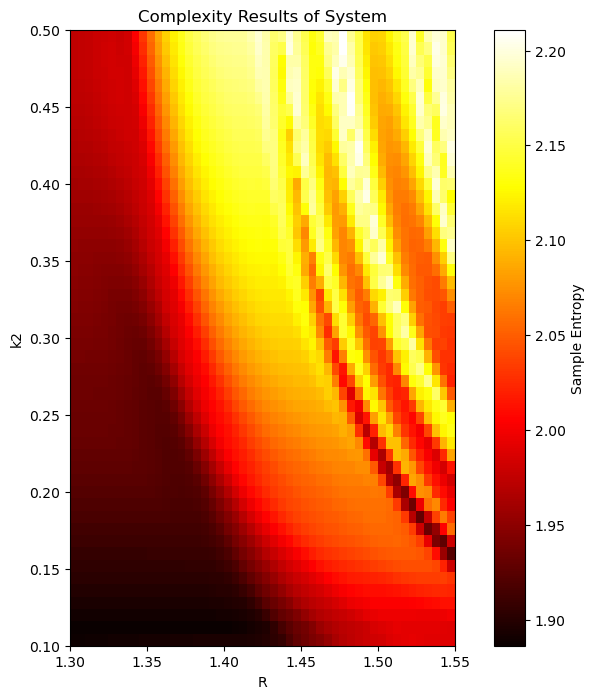

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pyentrp import entropy as ent

def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

a = 0.3
b = 0.3
c = 2
d = 0.8
k2_values = np.linspace(0.1, 0.5, 50)  # or adjust as needed
R_values = np.linspace(1.3, 1.55, 50)  # or adjust as needed
t = np.arange(0.0, 100.0, 0.01)

results = []

for k2 in k2_values:
    row = []
    for R in R_values:
        print(f"{k2} {R}")
        initial_conditions = [k2, 0.3, 0.3, 0.3]
        sol = odeint(system, initial_conditions, t, args=(a, b, c, d, R))
        sam_entropy = ent.sample_entropy(sol[:, 0], 4, 0.2 * np.std(sol[:, 0]))
        row.append(sam_entropy[0])
    results.append(row)

transposed = list(map(list, zip(*results)))
plt.figure(figsize=(10, 8))
plt.imshow(transposed, cmap='inferno', interpolation='nearest', extent=[R_values.min(), R_values.max(), k2_values.min(), k2_values.max()], origin='lower')
plt.colorbar(label='Sample Entropy')
plt.xlabel('k2')
plt.ylabel('R')
plt.title('Complexity Results of System')
plt.show()


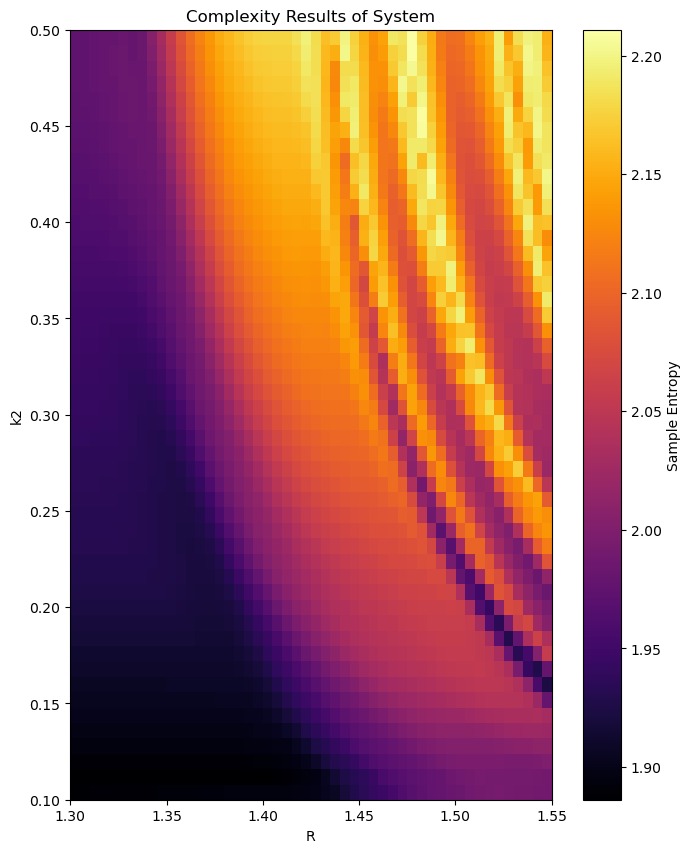

In [29]:
plt.figure(figsize=(8, 10))
plt.imshow(results, cmap='inferno', interpolation='nearest', extent=[R_values.min(), R_values.max(), k2_values.min(), k2_values.max()], origin='lower')
plt.colorbar(label='Sample Entropy')
plt.xlabel('R')
plt.ylabel('k2')
plt.title('Complexity Results of System')
plt.show()

0.1 1.3
0.1 1.3051020408163265
0.1 1.310204081632653
0.1 1.3153061224489797
0.1 1.3204081632653062
0.1 1.3255102040816327
0.1 1.3306122448979592
0.1 1.3357142857142859
0.1 1.3408163265306123
0.1 1.3459183673469388
0.1 1.3510204081632653
0.1 1.3561224489795918
0.1 1.3612244897959185
0.1 1.366326530612245
0.1 1.3714285714285714
0.1 1.376530612244898
0.1 1.3816326530612246
0.1 1.386734693877551
0.1 1.3918367346938776
0.1 1.396938775510204
0.1 1.4020408163265305
0.1 1.4071428571428573
0.1 1.4122448979591837
0.1 1.4173469387755102
0.1 1.4224489795918367
0.1 1.4275510204081634
0.1 1.4326530612244899
0.1 1.4377551020408164
0.1 1.4428571428571428
0.1 1.4479591836734693
0.1 1.453061224489796
0.1 1.4581632653061225
0.1 1.463265306122449
0.1 1.4683673469387755
0.1 1.4734693877551022
0.1 1.4785714285714286
0.1 1.4836734693877551
0.1 1.4887755102040816
0.1 1.4938775510204083
0.1 1.4989795918367348
0.1 1.5040816326530613
0.1 1.5091836734693878
0.1 1.5142857142857142
0.1 1.519387755102041
0.1 1.52448

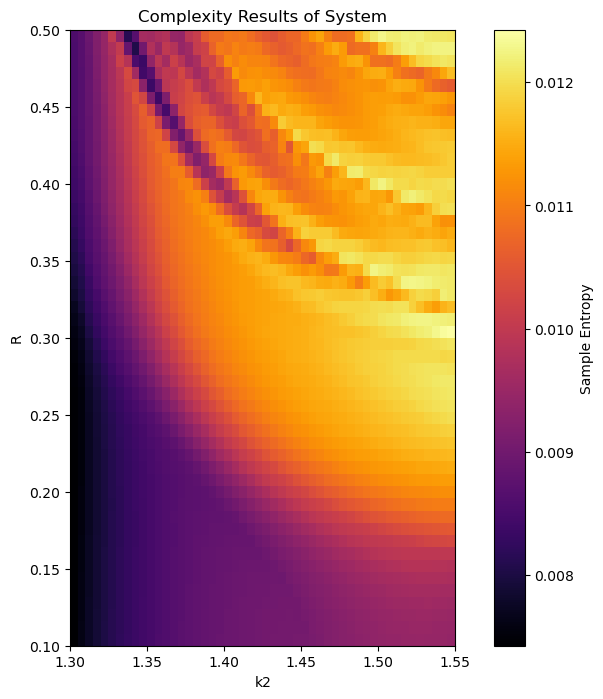

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pyentrp import entropy as ent

def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

a = 0.3
b = 0.3
c = 2
d = 0.8
k2_values = np.linspace(0.1, 0.5, 50)  # or adjust as needed
R_values = np.linspace(1.3, 1.55, 50)  # or adjust as needed
t = np.arange(0.0, 100.0, 0.01)

results = []

for k2 in k2_values:
    row = []
    for R in R_values:
        print(f"{k2} {R}")
        initial_conditions = [k2, 0.3, 0.3, 0.3]
        sol = odeint(system, initial_conditions, t, args=(a, b, c, d, R))
        sam_entropy = ent.sample_entropy(sol[:, 0], 4, 0.2 * np.std(sol[:, 0]))
        row.append(sam_entropy[1])
    results.append(row)

transposed = list(map(list, zip(*results)))
plt.figure(figsize=(10, 8))
plt.imshow(transposed, cmap='inferno', interpolation='nearest', extent=[R_values.min(), R_values.max(), k2_values.min(), k2_values.max()], origin='lower')
plt.colorbar(label='Sample Entropy')
plt.xlabel('k2')
plt.ylabel('R')
plt.title('Complexity Results of System')
plt.show()


0.1 1.3
0.1 1.3051020408163265
0.1 1.310204081632653
0.1 1.3153061224489797
0.1 1.3204081632653062
0.1 1.3255102040816327
0.1 1.3306122448979592
0.1 1.3357142857142859
0.1 1.3408163265306123
0.1 1.3459183673469388
0.1 1.3510204081632653
0.1 1.3561224489795918
0.1 1.3612244897959185
0.1 1.366326530612245
0.1 1.3714285714285714
0.1 1.376530612244898
0.1 1.3816326530612246
0.1 1.386734693877551
0.1 1.3918367346938776
0.1 1.396938775510204
0.1 1.4020408163265305
0.1 1.4071428571428573
0.1 1.4122448979591837
0.1 1.4173469387755102
0.1 1.4224489795918367
0.1 1.4275510204081634
0.1 1.4326530612244899
0.1 1.4377551020408164
0.1 1.4428571428571428
0.1 1.4479591836734693
0.1 1.453061224489796
0.1 1.4581632653061225
0.1 1.463265306122449
0.1 1.4683673469387755
0.1 1.4734693877551022
0.1 1.4785714285714286
0.1 1.4836734693877551
0.1 1.4887755102040816
0.1 1.4938775510204083
0.1 1.4989795918367348
0.1 1.5040816326530613
0.1 1.5091836734693878
0.1 1.5142857142857142
0.1 1.519387755102041
0.1 1.52448

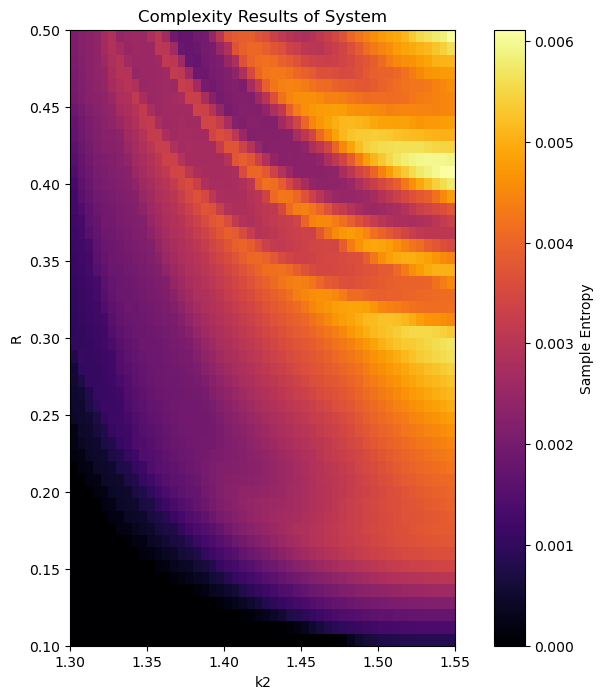

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pyentrp import entropy as ent

def system(x, t, a, b, c, d, R):
    dx1 = a*x[0] - R*x[0]*x[1] - a*x[0]*x[3]
    dx2 = R*x[0]*x[1] - a*x[1]*x[3] - x[1]
    dx3 = b*x[2] - a*c*x[2]*x[3]
    dx4 = d*(x[0] + x[1] + x[2])*x[3] - d*x[3]
    return [dx1, dx2, dx3, dx4]

a = 0.3
b = 0.3
c = 2
d = 0.8
k2_values = np.linspace(0.1, 0.5, 50)  # or adjust as needed
R_values = np.linspace(1.3, 1.55, 50)  # or adjust as needed
t = np.arange(0.0, 100.0, 0.01)

results = []

for k2 in k2_values:
    row = []
    for R in R_values:
        print(f"{k2} {R}")
        initial_conditions = [k2, 0.3, 0.3, 0.3]
        sol = odeint(system, initial_conditions, t, args=(a, b, c, d, R))
        sam_entropy = ent.sample_entropy(sol[:, 1], 4, 0.2 * np.std(sol[:,1]))
        row.append(sam_entropy[1])
    results.append(row)

transposed = list(map(list, zip(*results)))
plt.figure(figsize=(10, 8))
plt.imshow(transposed, cmap='inferno', interpolation='nearest', extent=[R_values.min(), R_values.max(), k2_values.min(), k2_values.max()], origin='lower')
plt.colorbar(label='Sample Entropy')
plt.xlabel('k2')
plt.ylabel('R')
plt.title('Complexity Results of System')
plt.show()


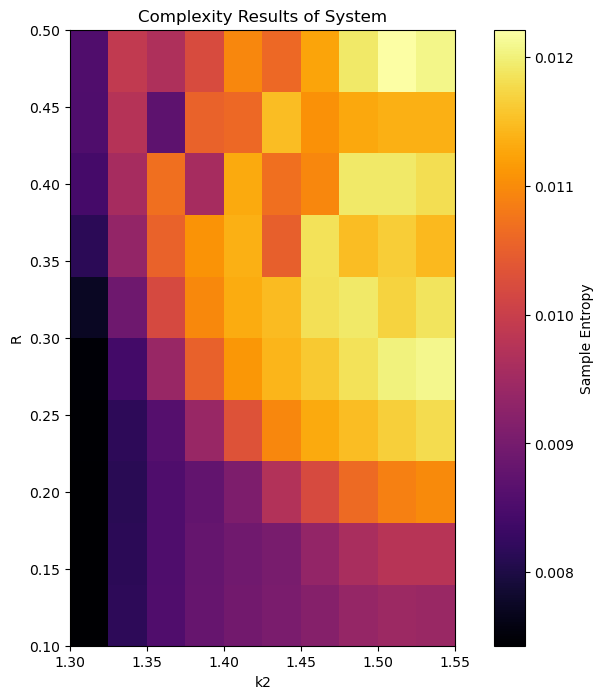

In [33]:
transposed = list(map(list, zip(*results)))
plt.figure(figsize=(10, 8))
plt.imshow(transposed, cmap='inferno', interpolation='nearest', extent=[R_values.min(), R_values.max(), k2_values.min(), k2_values.max()], origin='lower')
plt.colorbar(label='Sample Entropy')
plt.xlabel('k2')
plt.ylabel('R')
plt.title('Complexity Results of System')
plt.show()